# OTT 서비스 애니메이션 콘텐츠 이용 현황 분석

이 노트북은 "Over The Top 서비스의 애니메이션 콘텐츠 이용 현황 분석" 자료에 수록된 통계 데이터를 Pandas DataFrame으로 변환하여 분석하는 것을 목표로 합니다.

데이터 출처:
- 박수경, 이태구. (2023). Over The Top 서비스의 애니메이션 콘텐츠 이용 현황 분석. JCCT, 9(2), 445-450.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False


## 1. 데이터 로드


In [2]:
df_ott_preference = pd.read_csv('ott_preference.csv')
df_narrative_value = pd.read_csv('narrative_value.csv')
df_aesthetic_value = pd.read_csv('aesthetic_value.csv')
df_entertainment_value = pd.read_csv('entertainment_value.csv')

print('데이터 로드 완료!')
print(f'OTT 선호도 데이터: {df_ott_preference.shape}')
print(f'서사적 가치 데이터: {df_narrative_value.shape}')
print(f'심미적 가치 데이터: {df_aesthetic_value.shape}')
print(f'오락적 가치 데이터: {df_entertainment_value.shape}')


데이터 로드 완료!
OTT 선호도 데이터: (7, 5)
서사적 가치 데이터: (7, 3)
심미적 가치 데이터: (6, 3)
오락적 가치 데이터: (5, 3)


## 2. OTT 플랫폼별 애니메이션 작품 선호도 분석


In [3]:
print('=== OTT 플랫폼별 애니메이션 작품 선호도 ===')
display(df_ott_preference)


=== OTT 플랫폼별 애니메이션 작품 선호도 ===


,Platform,Short,Feature,TV_Series,OTT_Original
0,웨이브,5,5,4,0
1,넷플릭스,15,30,45,9
2,왓챠,8,6,14,0
3,라프텔,5,9,25,0
4,애니플러스,1,2,3,1
5,디즈니+,0,9,2,0
6,티빙,3,1,1,0


In [50]:
# 귀무가설: OTT 플랫폼별로 애니메이션 작품 유형 선호도에 차이가 없다.
# 대립가설: OTT 플랫폼별로 애니메이션 작품 유형 선호도에 차이가 있다.

contingency = df_ott_preference.iloc[:, 1:-1].values
chi2, p, dof, expected = chi2_contingency(contingency)


In [51]:
if p < 0.05:
    result = '귀무가설 기각, 플랫폼별 애니메이션 작품 유형 선호도에 차이가 있음'
else:
    result = '귀무가설 채택, 플랫폼별 애니메이션 작품 유형 선호도에 차이가 없음'


In [52]:
display(result)


'귀무가설 기각, 플랫폼별 애니메이션 작품 유형 선호도에 차이가 있음'

In [55]:
print('1단계: 관측값 추출')
observed = df_ott_preference.iloc[:, 1:-1]
print(observed)

print('2단계: 기대값 데이터프레임 생성')
expected_df = pd.DataFrame(expected, columns=observed.columns, index=df_ott_preference['Platform'])
print(expected_df)

print('3단계: 잔차(관측값 - 기대값) 계산')
residuals = observed - expected_df
print(residuals)

print('4단계: 기여도(잔차^2 / 기대값) 계산')
contrib = (residuals ** 2) / expected_df
print(contrib)

print('5단계: 전체 기여도 합산')
contrib_sum = contrib.sum().sum()
print(contrib_sum)


1단계: 관측값 추출
   Short  Feature  TV_Series  OTT_Original
0      5        5          4             0
1     15       30         45             9
2      8        6         14             0
3      5        9         25             0
4      1        2          3             1
5      0        9          2             0
6      3        1          1             0
2단계: 기대값 데이터프레임 생성
              Short    Feature  TV_Series  OTT_Original
Platform                                               
웨이브        2.551724   4.275862   6.482759      0.689655
넷플릭스      18.044335  30.236453  45.842365      4.876847
왓챠         5.103448   8.551724  12.965517      1.379310
라프텔        7.108374  11.911330  18.059113      1.921182
애니플러스      1.275862   2.137931   3.241379      0.344828
디즈니+       2.004926   3.359606   5.093596      0.541872
티빙         0.911330   1.527094   2.315271      0.246305
3단계: 잔차(관측값 - 기대값) 계산
       Short  Feature  TV_Series  OTT_Original
0        NaN      NaN        NaN           NaN
1    

<Figure size 1200x800 with 0 Axes>

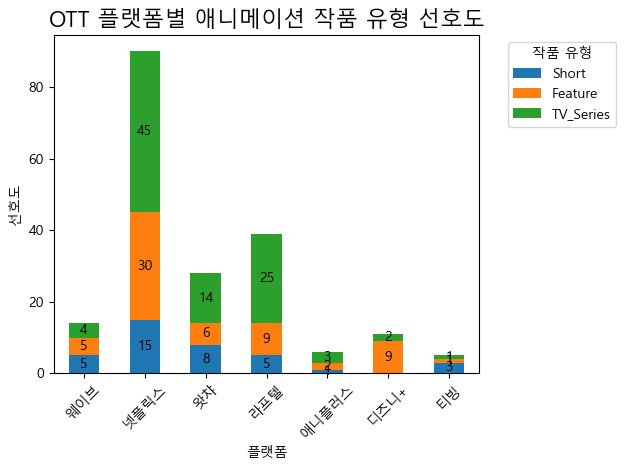

In [6]:
plt.figure(figsize=(12, 8))
ax = df_ott_preference.set_index('Platform').iloc[:, :-1].plot(kind='bar', stacked=True)
plt.title('OTT 플랫폼별 애니메이션 작품 유형 선호도', fontsize=16)
plt.xlabel('플랫폼')
plt.ylabel('선호도')
plt.legend(title='작품 유형', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
for c in ax.containers:
    labels = [f'{v.get_height():.0f}' if v.get_height() > 0 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='center', fontsize=10)
plt.tight_layout()
plt.show()


In [7]:
df_ott_preference['총합'] = df_ott_preference.iloc[:, 1:].sum(axis=1)
print('=== 플랫폼별 총 선호도 ===')
display(df_ott_preference[['Platform', '총합']].sort_values('총합', ascending=False))


=== 플랫폼별 총 선호도 ===


,Platform,총합
1,넷플릭스,99
3,라프텔,39
2,왓챠,28
0,웨이브,14
5,디즈니+,11
4,애니플러스,7
6,티빙,5


In [39]:
from scipy.stats import chi2_contingency

contingency = df_ott_preference.iloc[:, 1:-1].values
chi2, p, dof, expected = chi2_contingency(contingency)
print('카이제곱 통계량:', chi2)
print('p-value:', p)
print('자유도:', dof)
print('기대빈도표:\n', expected)


카이제곱 통계량: 39.11112310649029
p-value: 0.0027533354051624444
자유도: 18
기대빈도표:
 [[ 2.55172414  4.27586207  6.48275862  0.68965517]
 [18.04433498 30.2364532  45.84236453  4.87684729]
 [ 5.10344828  8.55172414 12.96551724  1.37931034]
 [ 7.10837438 11.91133005 18.0591133   1.92118227]
 [ 1.27586207  2.13793103  3.24137931  0.34482759]
 [ 2.00492611  3.35960591  5.09359606  0.54187192]
 [ 0.91133005  1.5270936   2.31527094  0.24630542]]


In [40]:
expected_df = pd.DataFrame(expected, columns=df_ott_preference.columns[1:-1], index=df_ott_preference['Platform'])
display(expected_df)


,Short,Feature,TV_Series,OTT_Original
Platform,,,,
웨이브,2.551724,4.275862,6.482759,0.689655
넷플릭스,18.044335,30.236453,45.842365,4.876847
왓챠,5.103448,8.551724,12.965517,1.379310
라프텔,7.108374,11.911330,18.059113,1.921182
애니플러스,1.275862,2.137931,3.241379,0.344828
디즈니+,2.004926,3.359606,5.093596,0.541872
티빙,0.911330,1.527094,2.315271,0.246305


In [47]:
if p < 0.05:
    print("카이제곱 검정 결과, p-value가 0.05보다 작으므로 OTT 플랫폼별로 애니메이션 작품 유형(Short, Feature, TV_Series, OTT_Original)에 대한 선호도가 통계적으로 다르다는 뜻이에요.")
    print("즉, 각 OTT 플랫폼마다 사람들이 좋아하는 애니메이션 작품의 종류가 다르게 나타났어요.")
    print("예를 들어, 어떤 플랫폼은 TV 시리즈를 더 많이 선호하고, 다른 플랫폼은 단편(Short)이나 장편(Feature)을 더 좋아할 수 있다는 의미예요.")
    print("이 결과는 우연이 아니라 실제로 플랫폼마다 선호하는 작품 유형이 다르다는 것을 보여줘요.")
else:
    print("카이제곱 검정 결과, p-value가 0.05보다 크므로 OTT 플랫폼별로 애니메이션 작품 유형에 대한 선호도가 통계적으로 비슷하다는 뜻이에요.")
    print("즉, 모든 OTT 플랫폼에서 사람들이 좋아하는 애니메이션 작품의 종류가 거의 비슷하게 나타났어요.")
    print("이 결과는 플랫폼에 상관없이 사람들이 선호하는 작품 유형이 크게 다르지 않다는 것을 보여줘요.")


카이제곱 검정 결과, p-value가 0.05보다 작으므로 OTT 플랫폼별로 애니메이션 작품 유형(Short, Feature, TV_Series, OTT_Original)에 대한 선호도가 통계적으로 다르다는 뜻이에요.
즉, 각 OTT 플랫폼마다 사람들이 좋아하는 애니메이션 작품의 종류가 다르게 나타났어요.
예를 들어, 어떤 플랫폼은 TV 시리즈를 더 많이 선호하고, 다른 플랫폼은 단편(Short)이나 장편(Feature)을 더 좋아할 수 있다는 의미예요.
이 결과는 우연이 아니라 실제로 플랫폼마다 선호하는 작품 유형이 다르다는 것을 보여줘요.


<Figure size 1200x800 with 0 Axes>

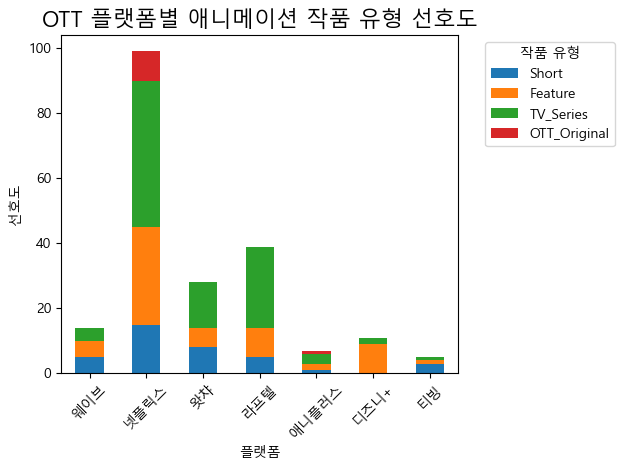

In [8]:
plt.figure(figsize=(12, 8))
df_ott_preference.set_index('Platform').iloc[:, :-1].plot(kind='bar', stacked=True)
plt.title('OTT 플랫폼별 애니메이션 작품 유형 선호도', fontsize=16)
plt.xlabel('플랫폼')
plt.ylabel('선호도')
plt.legend(title='작품 유형', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 3. 서사적 가치 분석


In [9]:
print('=== 서사적 가치 고려 요인 ===')
display(df_narrative_value.sort_values('Frequency', ascending=False))


=== 서사적 가치 고려 요인 ===


,Factor,Frequency,Percentage
1,기승전결의 구조,57,28.1
0,캐릭터 성격 설정,32,15.8
2,스토리의 주제,32,15.8
5,소재의 참신성,31,15.3
6,캐릭터의 행동동기,19,9.4
3,전달 메세지,17,8.4
4,사건의 인과성,15,7.4


In [41]:
from scipy.stats import chisquare

observed = df_narrative_value['Frequency'].values
expected = [observed.sum() / len(observed)] * len(observed)
chi2_stat, p_value = chisquare(f_obs=observed, f_exp=expected)


In [43]:
print('서사적 가치 고려 요인 빈도에 대한 카이제곱 검정 결과를 출력합니다.')
print('카이제곱 통계량:', chi2_stat)
print('p-value:', p_value)
print('\n설명:')
print('카이제곱 검정은 각 요인이 비슷하게 선택되었는지, 아니면 어떤 요인이 더 많이 선택되었는지 알아보는 통계 방법이에요.')
print('카이제곱 통계량이 클수록, 그리고 p-value가 0.05보다 작을수록 "모든 요인이 비슷하게 선택된 것이 아니라, 어떤 요인이 더 많이 선택되었다"고 볼 수 있어요.')
print('즉, p-value가 0.05보다 작으면 "특정 요인이 더 중요하게 여겨졌다"고 해석할 수 있어요.')


서사적 가치 고려 요인 빈도에 대한 카이제곱 검정 결과를 출력합니다.
카이제곱 통계량: 42.96551724137932
p-value: 1.1849062987441187e-07

설명:
카이제곱 검정은 각 요인이 비슷하게 선택되었는지, 아니면 어떤 요인이 더 많이 선택되었는지 알아보는 통계 방법이에요.
카이제곱 통계량이 클수록, 그리고 p-value가 0.05보다 작을수록 "모든 요인이 비슷하게 선택된 것이 아니라, 어떤 요인이 더 많이 선택되었다"고 볼 수 있어요.
즉, p-value가 0.05보다 작으면 "특정 요인이 더 중요하게 여겨졌다"고 해석할 수 있어요.


In [45]:
for i, row in df_narrative_value.iterrows():
    factor = row['Factor']
    freq = row['Frequency']
    percent = row['Percentage']
    if percent >= 25:
        print(f"{factor}는 많은 사람들이 중요하게 생각했어요.")
    elif percent >= 10:
        print(f"{factor}도 꽤 많은 사람들이 선택했어요.")
    else:
        print(f"{factor}는 상대적으로 적은 사람들이 선택했어요.")


캐릭터 성격 설정도 꽤 많은 사람들이 선택했어요.
기승전결의 구조는 많은 사람들이 중요하게 생각했어요.
스토리의 주제도 꽤 많은 사람들이 선택했어요.
전달 메세지는 상대적으로 적은 사람들이 선택했어요.
사건의 인과성는 상대적으로 적은 사람들이 선택했어요.
소재의 참신성도 꽤 많은 사람들이 선택했어요.
캐릭터의 행동동기는 상대적으로 적은 사람들이 선택했어요.


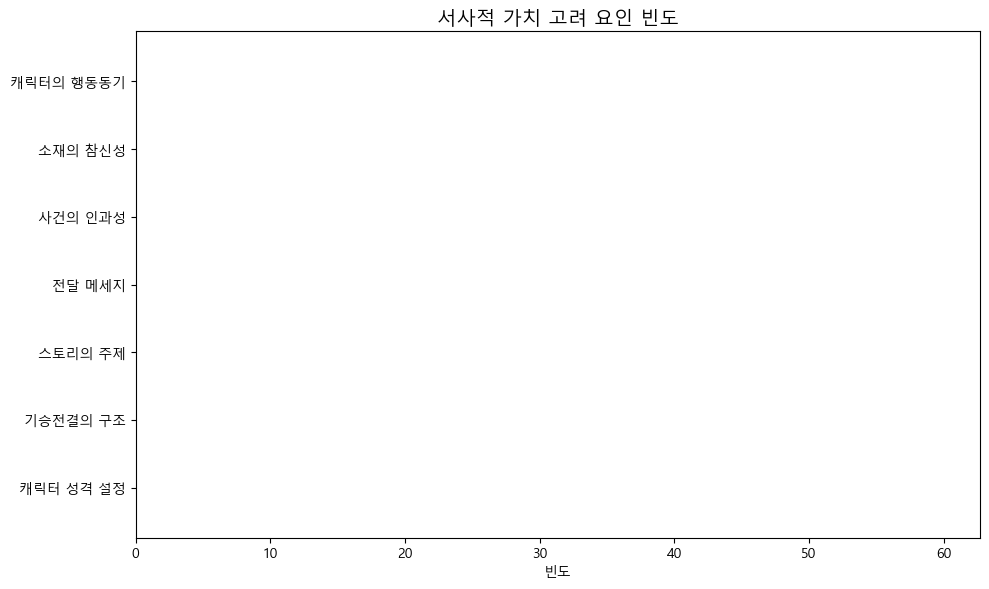

In [13]:
import matplotlib.animation as animation

fig, ax = plt.subplots(figsize=(10, 6))

def update(num):
    ax.clear()
    ax.barh(
        df_narrative_value['Factor'],
        df_narrative_value['Frequency'].clip(upper=df_narrative_value['Frequency'].max() * num / 100),
        color='#66b3ff'
    )
    ax.set_title('서사적 가치 고려 요인 빈도', fontsize=14)
    ax.set_xlabel('빈도')
    ax.set_xlim(0, df_narrative_value['Frequency'].max() * 1.1)
    plt.tight_layout()

ani = animation.FuncAnimation(
    fig, update, frames=range(0, 101, 5), interval=100, repeat=False
)

from IPython.display import HTML
HTML(ani.to_jshtml())


## 4. 심미적 가치 분석


In [14]:
print('=== 심미적 가치 고려 요인 ===')
display(df_aesthetic_value.sort_values('Frequency', ascending=False))


=== 심미적 가치 고려 요인 ===


,Factor,Frequency,Percentage
2,장면연출,67,33.0
5,그림체(작화),64,31.5
0,캐릭터의 디자인,57,28.1
3,사운드 활용,8,3.9
4,캐릭터의 움직임,4,2.0
1,배경 디자인,3,1.5


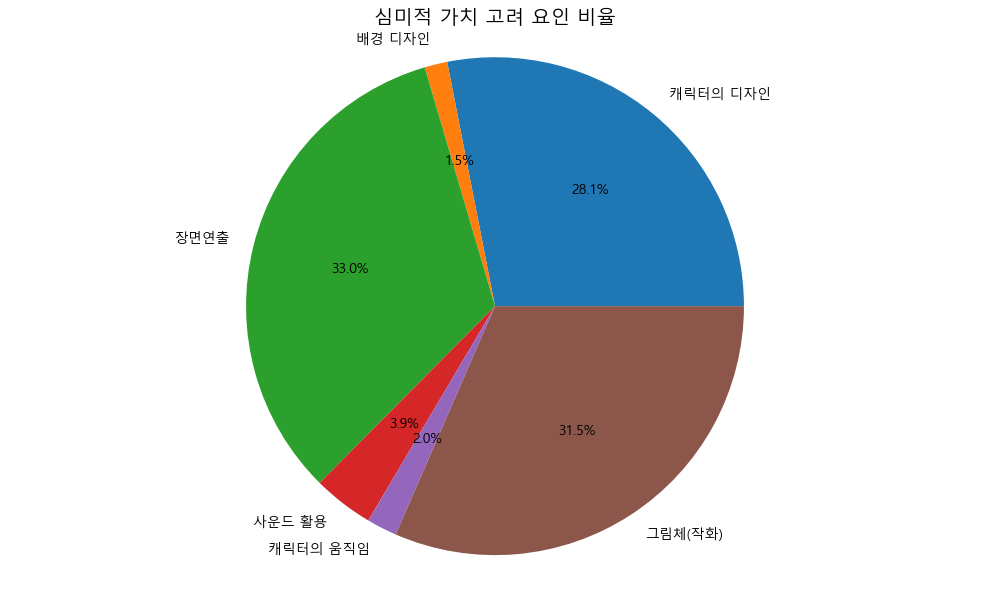

In [15]:
plt.figure(figsize=(10, 6))
plt.pie(df_aesthetic_value['Frequency'], labels=df_aesthetic_value['Factor'], autopct='%1.1f%%')
plt.title('심미적 가치 고려 요인 비율', fontsize=14)
plt.axis('equal')
plt.tight_layout()
plt.show()


## 5. 오락적 가치 분석


In [16]:
print('=== 오락적 가치 고려 요인 ===')
display(df_entertainment_value.sort_values('Frequency', ascending=False))


=== 오락적 가치 고려 요인 ===


,Factor,Frequency,Percentage
2,몰입감,86,42.4
0,즐거움과 재미,81,39.9
1,독특하고 자극적인 것,26,12.8
4,여가적 욕구 충족,6,3.0
3,공감성,4,2.0


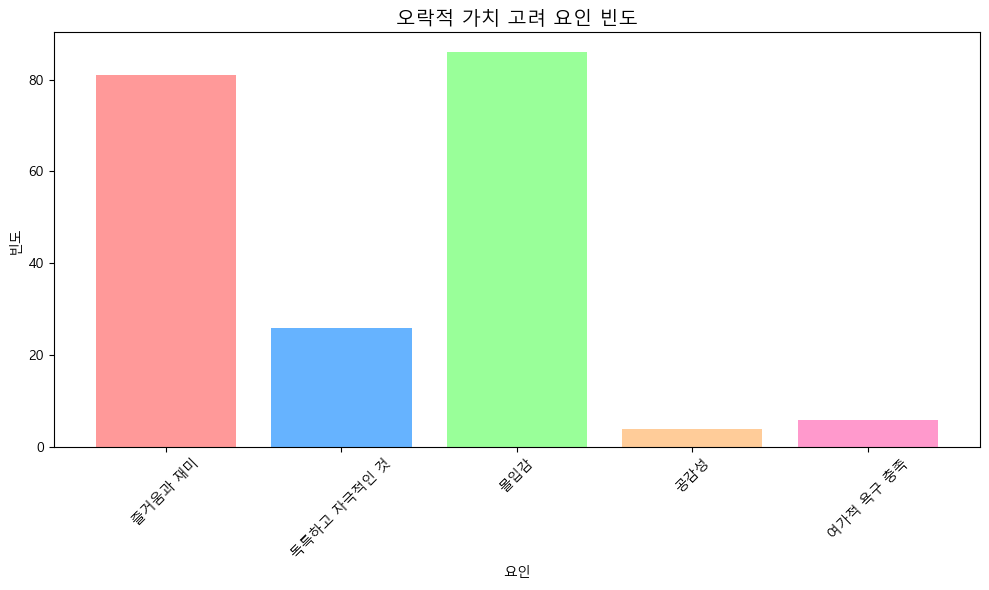

In [17]:
plt.figure(figsize=(10, 6))
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#ff99cc']
plt.bar(df_entertainment_value['Factor'], df_entertainment_value['Frequency'], color=colors)
plt.title('오락적 가치 고려 요인 빈도', fontsize=14)
plt.xlabel('요인')
plt.ylabel('빈도')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 6. 종합 분석


In [18]:
total_narrative = df_narrative_value['Frequency'].sum()
total_aesthetic = df_aesthetic_value['Frequency'].sum()
total_entertainment = df_entertainment_value['Frequency'].sum()

print('=== 가치 유형별 총 빈도 ===')
print(f'서사적 가치: {total_narrative}')
print(f'심미적 가치: {total_aesthetic}')
print(f'오락적 가치: {total_entertainment}')

value_summary = pd.DataFrame({
    '가치 유형': ['서사적 가치', '심미적 가치', '오락적 가치'],
    '총 빈도': [total_narrative, total_aesthetic, total_entertainment]
})

display(value_summary)


=== 가치 유형별 총 빈도 ===
서사적 가치: 203
심미적 가치: 203
오락적 가치: 203


,가치 유형,총 빈도
0,서사적 가치,203
1,심미적 가치,203
2,오락적 가치,203


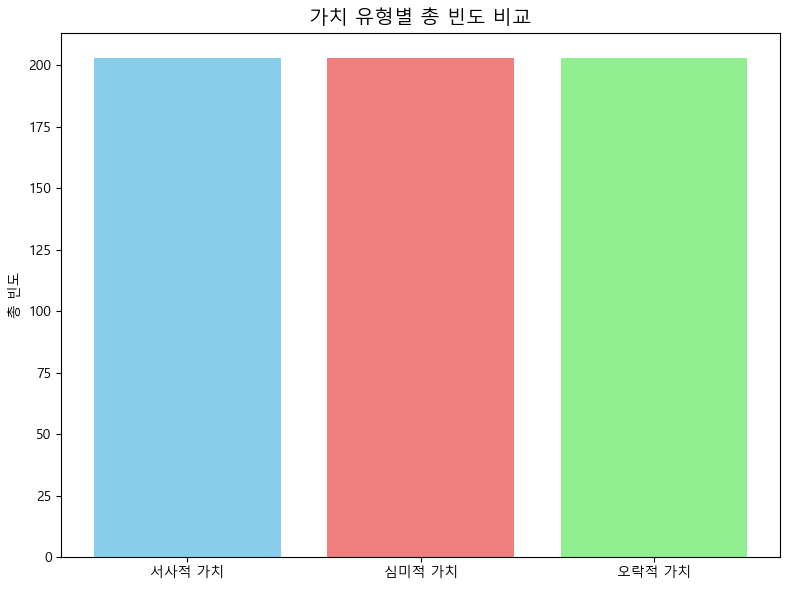

In [19]:
plt.figure(figsize=(8, 6))
plt.bar(value_summary['가치 유형'], value_summary['총 빈도'], 
        color=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('가치 유형별 총 빈도 비교', fontsize=14)
plt.ylabel('총 빈도')
plt.tight_layout()
plt.show()


## 7. 고급 분석 - 상관관계 및 통계


In [20]:
print('=== OTT 플랫폼별 통계 요약 ===')
numeric_cols = ['Short', 'Feature', 'TV_Series', 'OTT_Original']
summary_stats = df_ott_preference[numeric_cols].describe()
display(summary_stats)


=== OTT 플랫폼별 통계 요약 ===


,Short,Feature,TV_Series,OTT_Original
count,7.000000,7.000000,7.000000,7.000000
mean,5.285714,8.857143,13.428571,1.428571
std,5.056820,9.822229,16.399768,3.359422
min,0.000000,1.000000,1.000000,0.000000
25%,2.000000,3.500000,2.500000,0.000000
50%,5.000000,6.000000,4.000000,0.000000
75%,6.500000,9.000000,19.500000,0.500000
max,15.000000,30.000000,45.000000,9.000000


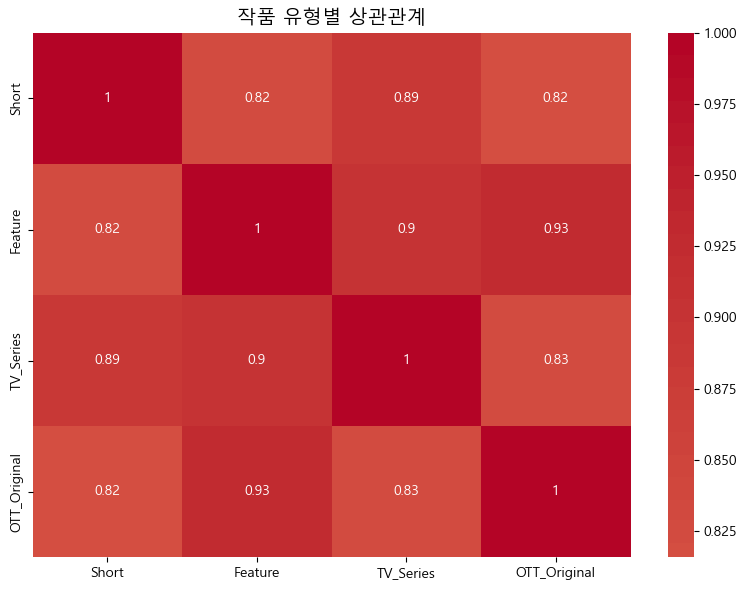

In [21]:
correlation_matrix = df_ott_preference[numeric_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('작품 유형별 상관관계', fontsize=14)
plt.tight_layout()
plt.show()


## 8. 결론 및 인사이트


In [25]:
print('=== 주요 인사이트 ===')
print('1. 가장 인기 있는 OTT 플랫폼:', df_ott_preference.loc[df_ott_preference['총합'].idxmax(), 'Platform'])
print('2. 가장 선호되는 작품 유형:', df_ott_preference[numeric_cols].sum().idxmax())
print('3. 서사적 가치 중 가장 중요한 요소:', df_narrative_value.loc[df_narrative_value['Frequency'].idxmax(), 'Factor'])
print('4. 심미적 가치 중 가장 중요한 요소:', df_aesthetic_value.loc[df_aesthetic_value['Frequency'].idxmax(), 'Factor'])
print('5. 오락적 가치 중 가장 중요한 요소:', df_entertainment_value.loc[df_entertainment_value['Frequency'].idxmax(), 'Factor'])


=== 주요 인사이트 ===
1. 가장 인기 있는 OTT 플랫폼: 넷플릭스
2. 가장 선호되는 작품 유형: TV_Series
3. 서사적 가치 중 가장 중요한 요소: 기승전결의 구조
4. 심미적 가치 중 가장 중요한 요소: 장면연출
5. 오락적 가치 중 가장 중요한 요소: 몰입감
